In [10]:
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import cv2
import os
from mpl_toolkits.mplot3d import Axes3D

(427, 440, 3)


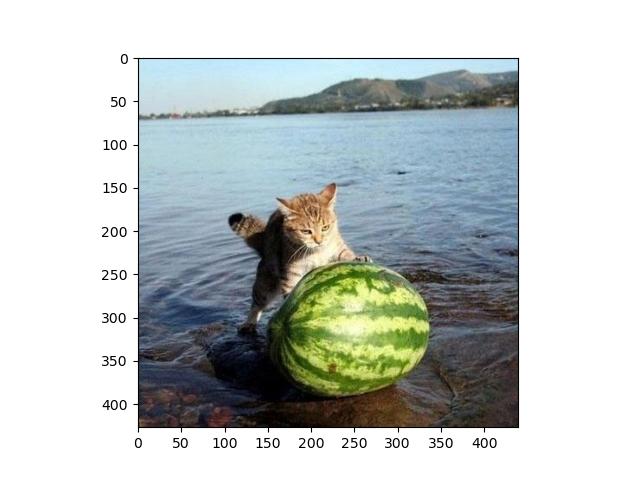

In [11]:
A = plt.imread("cat.jpg")
#A = plt.imread("cat2.jpg")
fig, ax = plt.subplots()
print(A.shape)
ax.imshow(A)

In [12]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [13]:
Abw = rgb2gray(A)
nx, ny = Abw.shape
plt.imshow(Abw, cmap=plt.get_cmap('gray'))

In [14]:
At = np.fft.fft2(Abw)
F = np.log(np.abs(np.fft.fftshift(At)) + 1)
F = np.double(F)
out = np.zeros(F.shape, np.double)
F = cv2.normalize(F, out, 1.0, 0.0, cv2.NORM_MINMAX)
plt.imshow(F,cmap=plt.get_cmap('gray'))

C:\Temp\ipykernel_6024\1559999729.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  Alow = np.uint8(np.fft.ifft2(Atlow))


2474.753729400001
12373.768647000004
24747.53729400001


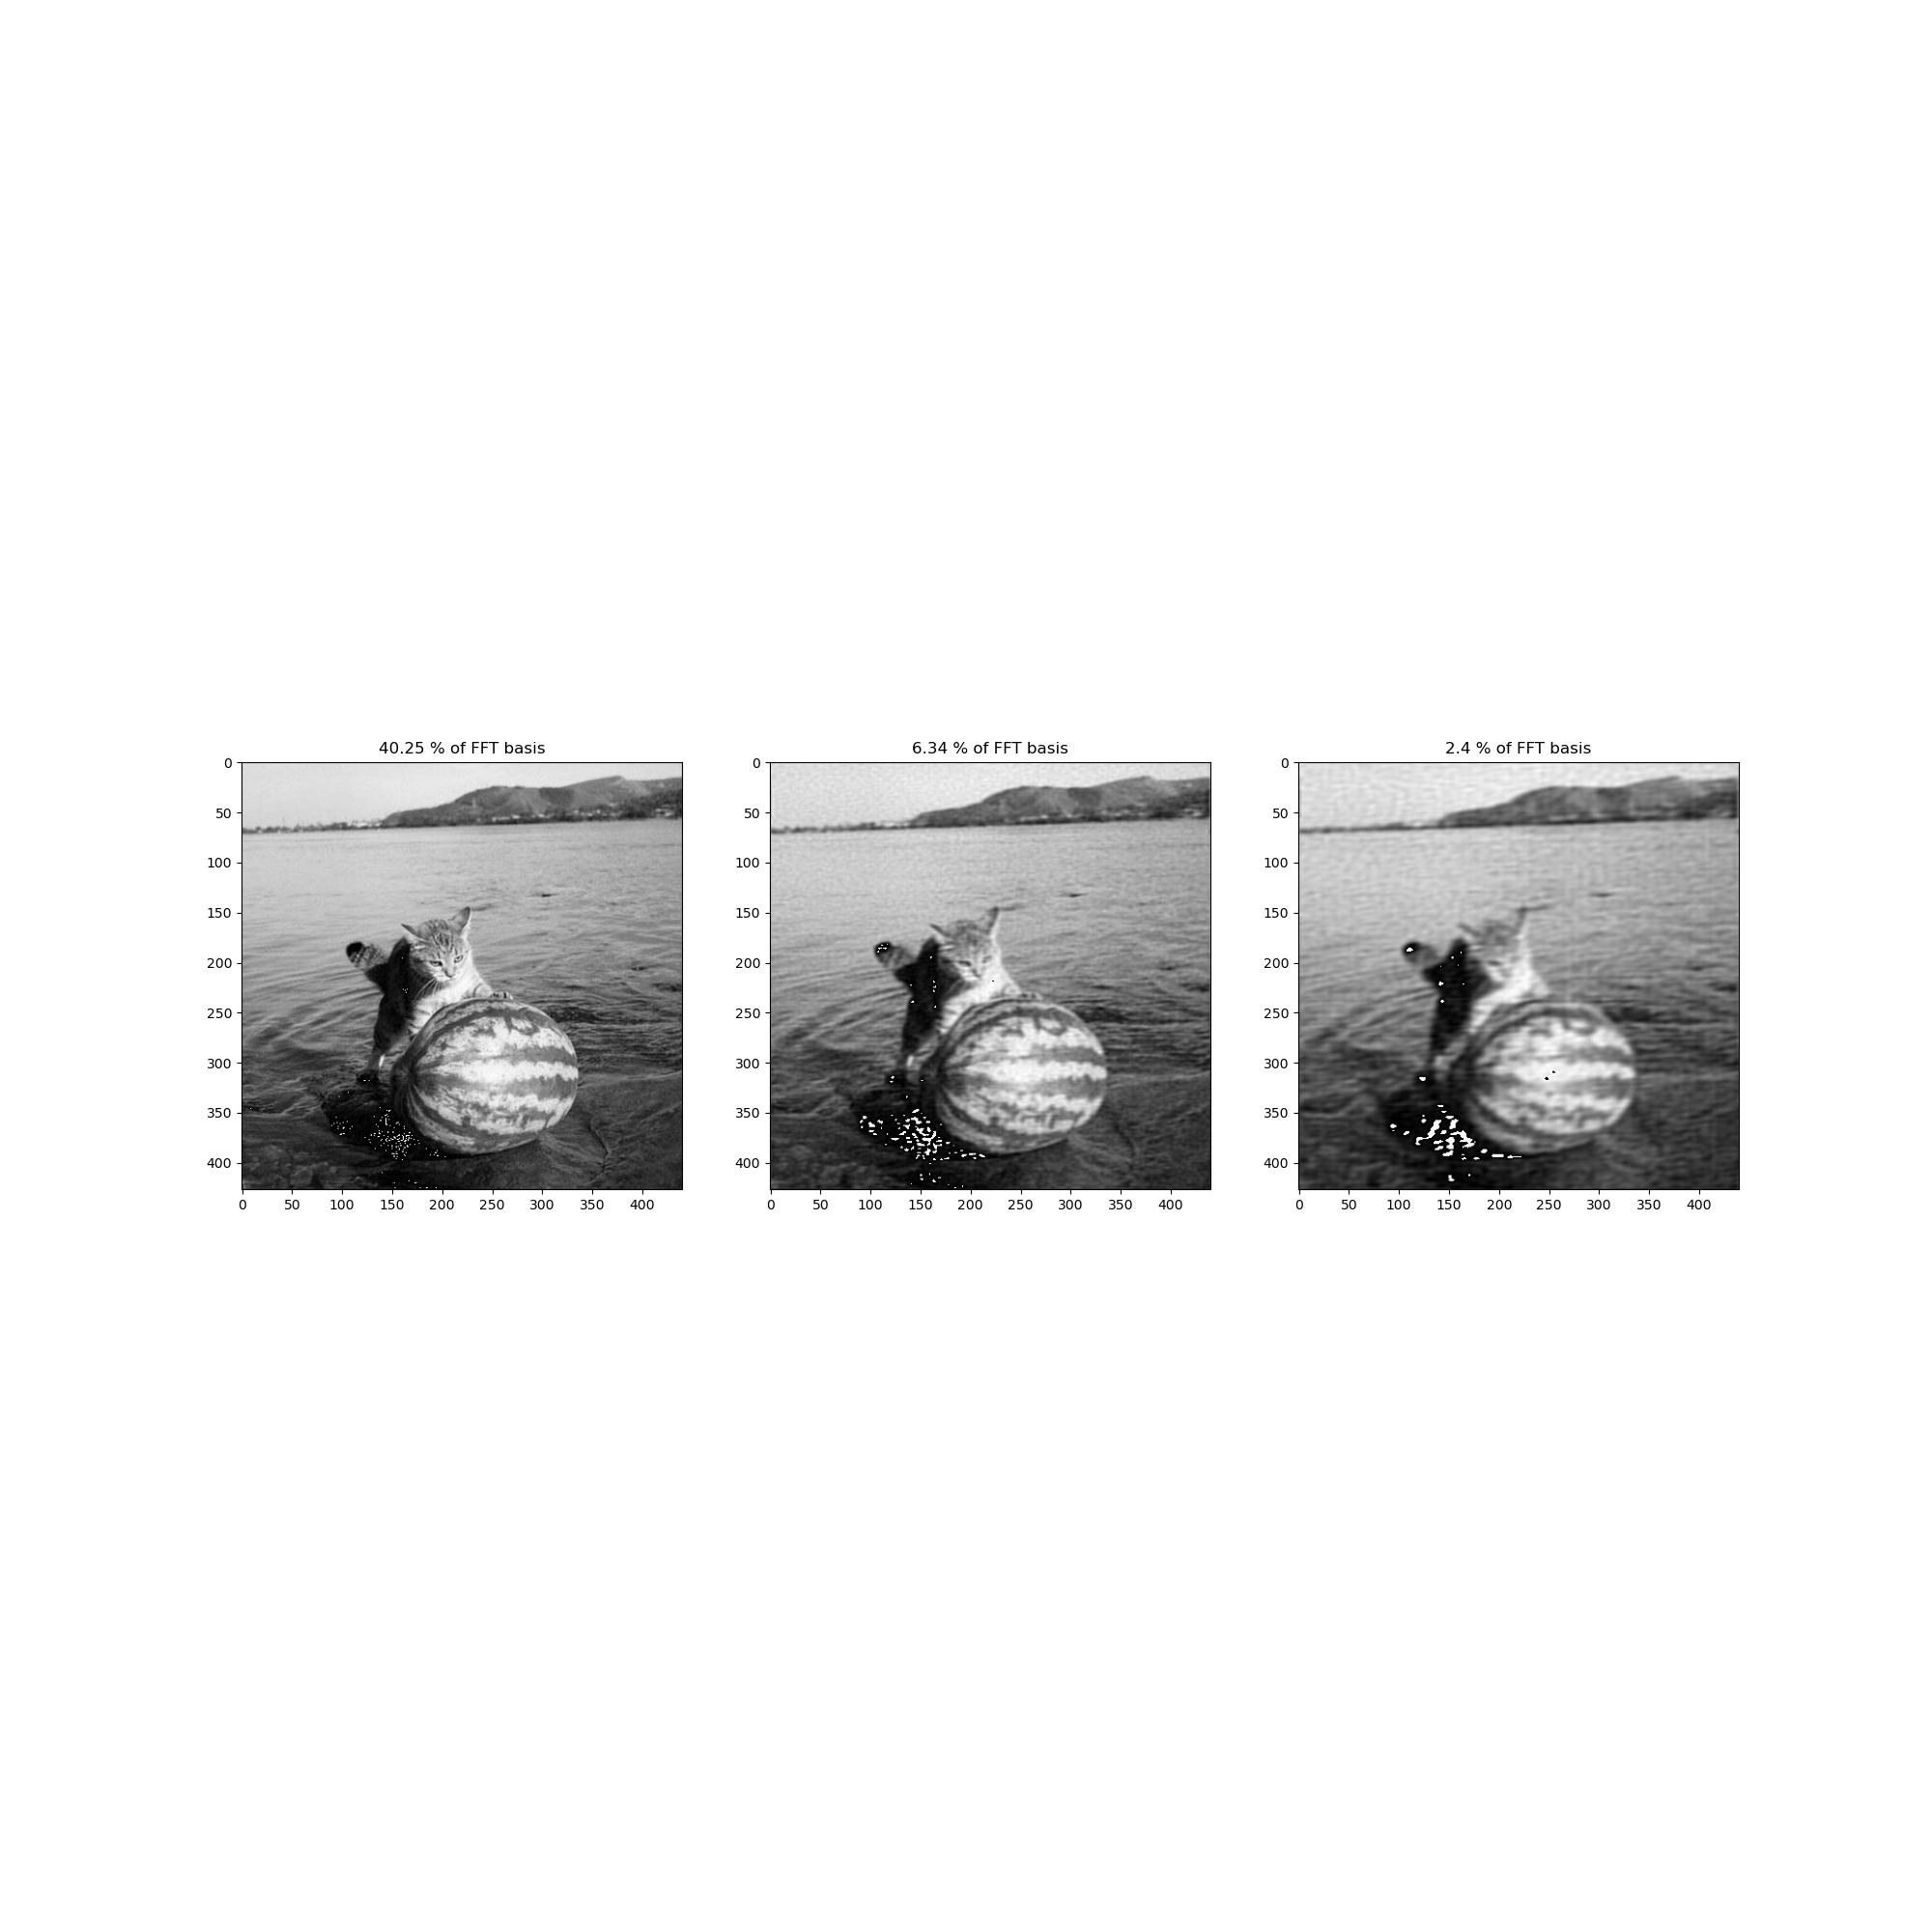

In [15]:
fig,ax= plt.subplots(1,3)
fig.set_size_inches(20,20)

for i, thresh in enumerate(0.1*np.array([0.001, 0.005, 0.01])*np.max(np.abs(At))):
    ind = np.abs(At) > thresh
    count = nx*ny - np.sum(np.sum(ind))
    Atlow = At * ind
    percent = 100 - count/(nx*ny)*100
    Alow = np.uint8(np.fft.ifft2(Atlow))
    print(thresh)
    ax[i].imshow(Alow,cmap=plt.get_cmap('gray'))
    ax[i].set_title("{} % of FFT basis".format(round(percent, 2)))